# Working with data 2017. Class 8
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 1. Clustering
## 2. Data imputation
## 3. Dimensionality reduction

In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
import scipy.stats

import statsmodels.formula.api as smf

# 1. Clustering

In [2]:
#Som elibraries
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans

In [3]:
#Read teh data, dropna, get sample
df = pd.read_csv("data/big3_position.csv",sep="\t").dropna()
df["Revenue"] = np.log10(df["Revenue"])
df["Assets"] = np.log10(df["Assets"])
df["Employees"] = np.log10(df["Employees"])
df["MarketCap"] = np.log10(df["MarketCap"])
df = df.replace([np.inf,-np.inf],np.nan).dropna().sample(300)
df.head(2)

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt
1606,TRANSMONTAIGNE PARTNERS L.P.,US342037221,0.00,130,5.183298,5.817358,2.653213,5.799317,New York Stock Exchange (NYSE),Industrial company
2540,MONARCH FINANCIAL HOLDINGS INC,US541896433,1.95,4,5.111491,6.065000,2.808211,5.361174,NASDAQ National Market,Bank


In [4]:
#Scale variables to give all of them the same weight
X = df.loc[:,["Revenue","Assets","Employees","MarketCap"]]
X = preprocessing.scale(X)
print(X.sum(0))
print(X.std(0))
X

[ -1.52322599e-13   1.15463195e-14  -3.26128013e-14  -1.76747506e-13]
[ 1.  1.  1.  1.]


array([[-0.4167572 , -0.15232465, -0.51062788, -0.07562001],
       [-0.48842543,  0.13291634, -0.33684611, -0.57679564],
       [ 0.02678046, -0.53907616,  0.85928926, -1.1173938 ],
       ..., 
       [ 0.78406   ,  0.90255769,  0.71704103,  0.85413886],
       [ 0.32652566, -0.18846638,  0.84284894, -0.30915682],
       [-0.14079303, -0.76932154,  0.23945175, -0.54881192]])

# 1a. Clustering with K-means 
- k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
- Other methods: http://scikit-learn.org/stable/modules/clustering.html


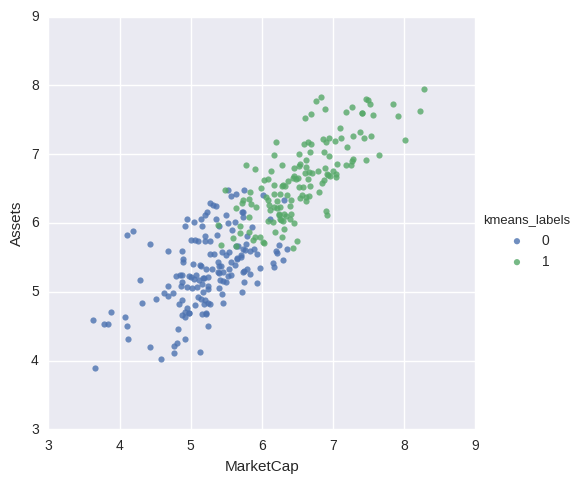

In [5]:
#Get labels of each row and add a new column with the labels
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_
df["kmeans_labels"] = labels
sns.lmplot(x="MarketCap",y="Assets",hue="kmeans_labels",fit_reg=False,data=df)

# 1b. Clustering with DBSCAN
- The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as oppos

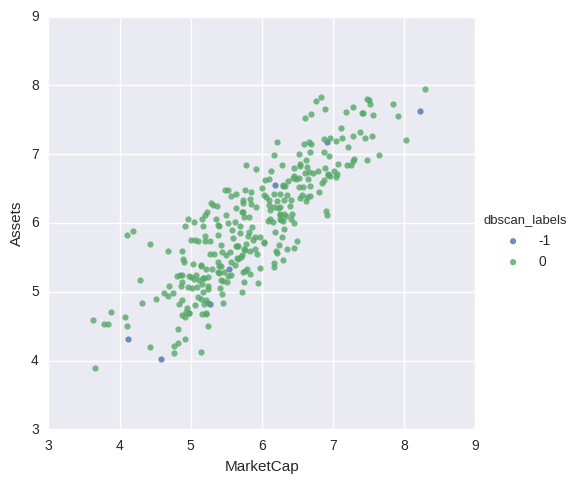

In [6]:
#Get labels of each row and add a new column with the labels
db = DBSCAN(eps=1, min_samples=10).fit(X)
labels = db.labels_
df["dbscan_labels"] = labels
sns.lmplot(x="MarketCap",y="Assets",hue="dbscan_labels",fit_reg=False,data=df)

In [7]:
Image(url="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png")

# 1c. Hierarchical clustering
- Keeps aggreagating from a point

[[   0.          150.04717583  110.43267807  158.28678366]
 [ 150.04717583    0.          186.27515624  132.22902991]
 [ 110.43267807  186.27515624    0.          179.82931924]
 [ 158.28678366  132.22902991  179.82931924    0.        ]]


/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


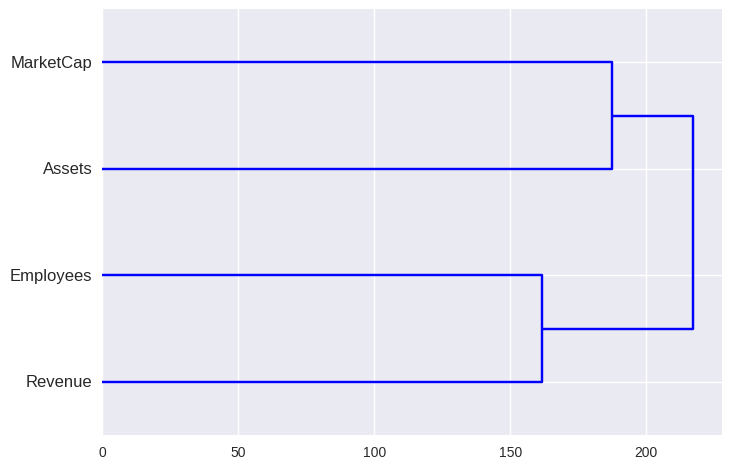

In [8]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate distance matrix based on the difference between rows
D = np.zeros([4,4])
for i in range(4):
    for j in range(4):
        D[i,j] = np.sum(np.abs(X[:,i]-X[:,j])) #Euclidean distance or mutual information are also common
        
print(D)

#Create the linkage and plot
Y = sch.linkage(D, method='centroid') #many methods, single, complete...
Z1 = sch.dendrogram(Y, orientation='right',labels=["Revenue","Assets","Employees","MarketCap"])


# 2. Imputation of missing data (fancy)

In [ ]:
#Required libraries
!conda install tensorflow -y
!pip install fancyimpute
!pip install pydot_ng

In [9]:
import sklearn.preprocessing
import sklearn


In [10]:
#Read the data again but do not 
df = pd.read_csv("data/big3_position.csv",sep="\t")
df["Revenue"] = np.log10(df["Revenue"])
df["Assets"] = np.log10(df["Assets"])
df["Employees"] = np.log10(df["Employees"])
df["MarketCap"] = np.log10(df["MarketCap"])


le = sklearn.preprocessing.LabelEncoder()
labels = le.fit_transform(df["TypeEnt"])
df["TypeEnt_int"] = labels

print(le.classes_)

df = df.replace([np.inf,-np.inf],np.nan).sample(300)
df.head(2)

['Bank' 'Financial company' 'Foundation/Research institute'
 'Industrial company' 'Insurance company' 'Venture capital']


/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


,Company_name,Company_ID,Big3Share,Position,Revenue,Assets,Employees,MarketCap,Exchange,TypeEnt,TypeEnt_int
1332,"THERMON GROUP HOLDINGS, INC.",US272228185,12.86,1,5.489365,5.656394,2.996074,5.817061,New York Stock Exchange (NYSE),Industrial company,3
889,NATIONAL COMMERCE CORP,US208627710,3.98,4,4.766048,6.246343,2.460898,5.401126,NASDAQ National Market,Bank,0


In [11]:
X = df.loc[:,["Revenue","Assets","Employees","MarketCap","TypeEnt_int"]].values
X

array([[ 5.48936496,  5.65639434,  2.99607365,  5.81706137,  3.        ],
       [ 4.7660483 ,  6.2463432 ,  2.46089784,  5.40112644,  0.        ],
       [ 3.45086469,  4.65090948,         nan,  4.41630759,  5.        ],
       ..., 
       [ 2.49554434,  4.65645278,  1.59106461,  4.33491595,  3.        ],
       [ 6.7998848 ,  6.80649879,  4.35218252,  7.18118611,  3.        ],
       [ 5.5938463 ,  5.83517037,  3.09829754,  6.39841313,  3.        ]])

In [12]:
df.describe()

,Big3Share,Position,Revenue,Assets,Employees,MarketCap,TypeEnt_int
count,300.000000,300.000000,284.000000,283.000000,258.000000,300.000000,300.00000
mean,9.765000,15.260000,5.620435,5.916207,3.107731,5.859656,2.53000
std,7.473155,33.330599,0.997859,0.955129,0.961766,0.934221,1.10446
min,0.000000,1.000000,2.495544,3.772835,0.301030,3.805841,0.00000
25%,2.175000,1.000000,4.953993,5.204932,2.449460,5.217086,3.00000
50%,9.345000,3.000000,5.587745,5.870951,3.106120,5.832137,3.00000
75%,16.200000,8.000000,6.396468,6.653160,3.794465,6.520157,3.00000
max,29.130000,145.000000,7.875061,8.879318,5.623249,8.034211,5.00000


In [15]:
from fancyimpute import KNN

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 10 nearest rows which have a feature to fill in each row's missing features
df.loc[:,["Revenue","Assets","Employees","MarketCap","TypeEnt_int"]] = \
KNN(k=10).complete(df.loc[:,["Revenue","Assets","Employees","MarketCap","TypeEnt_int"]])

ValueError: Input matrix is not missing any values

In [16]:
df.describe()

,Big3Share,Position,Revenue,Assets,Employees,MarketCap,TypeEnt_int
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,9.765000,15.260000,5.559092,5.941882,3.040099,5.859656,2.53000
std,7.473155,33.330599,1.022427,0.947498,0.970501,0.934221,1.10446
min,0.000000,1.000000,2.495544,3.772835,0.301030,3.805841,0.00000
25%,2.175000,1.000000,4.795880,5.224896,2.331932,5.217086,3.00000
50%,9.345000,3.000000,5.548352,5.944975,3.061252,5.832137,3.00000
75%,16.200000,8.000000,6.353974,6.666205,3.760260,6.520157,3.00000
max,29.130000,145.000000,7.875061,8.879318,5.623249,8.034211,5.00000
